# Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

# Business Goal
The job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.

In [2]:
# Installing Packages

In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc

In [4]:
count_new = pd.read_csv("Country-data.csv")

In [5]:
count_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD48780E08>,
      dtype=object)

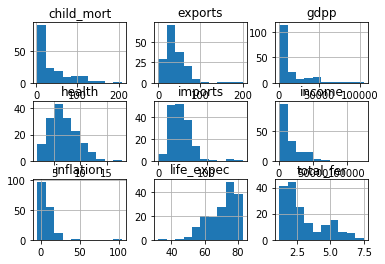

In [7]:
count_new.hist()

In [8]:
count_new.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [15]:
count_new.drop("country", axis=1, inplace=True)

In [16]:
scaler = StandardScaler() 
count_scaled = scaler.fit_transform(count_new)
count_normalized = normalize(count_scaled)

In [24]:
count_normalized = pd.DataFrame(count_normalized)
count_normalized.head()

,0,1,2,3,4,5,6,7,8
0,0.399908,-0.352455,0.086416,-0.025531,-0.250264,0.048717,-0.501333,0.589205,-0.210300
1,-0.365985,-0.325723,-0.065881,0.048103,-0.254902,-0.212106,0.439948,-0.583983,-0.329773
2,-0.163969,-0.059571,-0.580597,-0.385691,-0.132725,0.474344,0.402916,-0.023081,-0.279685
3,0.514838,0.198822,-0.371311,-0.042390,-0.150016,0.355665,-0.302377,0.545696,-0.132380
4,-0.491459,0.113510,-0.202688,0.351527,0.071873,-0.425130,0.497552,-0.382880,-0.029543


In [25]:
count_normalized.columns = count_new.columns
count_normalized.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.399908,-0.352455,0.086416,-0.025531,-0.250264,0.048717,-0.501333,0.589205,-0.210300
1,-0.365985,-0.325723,-0.065881,0.048103,-0.254902,-0.212106,0.439948,-0.583983,-0.329773
2,-0.163969,-0.059571,-0.580597,-0.385691,-0.132725,0.474344,0.402916,-0.023081,-0.279685
3,0.514838,0.198822,-0.371311,-0.042390,-0.150016,0.355665,-0.302377,0.545696,-0.132380
4,-0.491459,0.113510,-0.202688,0.351527,0.071873,-0.425130,0.497552,-0.382880,-0.029543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD4DD0F048>,
      dtype=object)

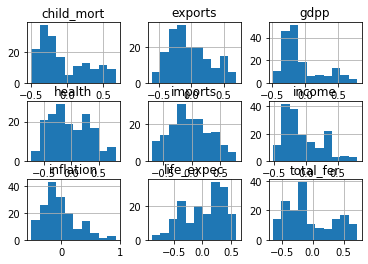

In [26]:
count_normalized.hist()

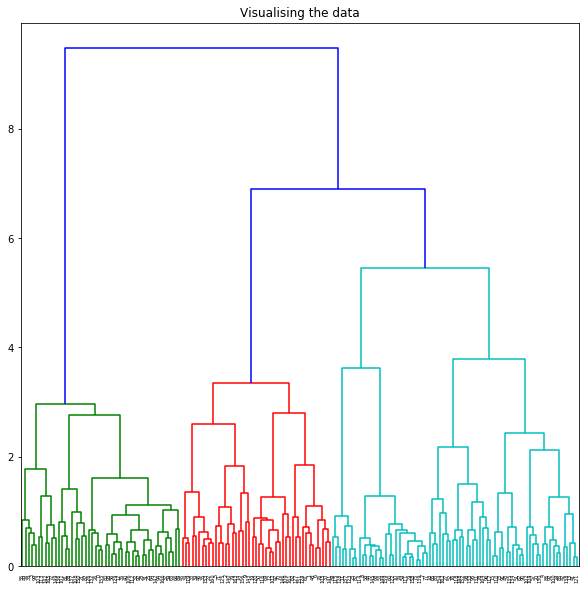

In [27]:
plt.figure(figsize =(10, 10)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(count_normalized, method ='ward'))) 

In [36]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
ac3 = AgglomerativeClustering(n_clusters = 3) 
ac4 = AgglomerativeClustering(n_clusters = 4) 
ac5 = AgglomerativeClustering(n_clusters = 5) 

In [37]:
k = [2, 3, 4, 5]
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 

silhouette_scores.append(silhouette_score(count_normalized, ac2.fit_predict(count_normalized))) 
silhouette_scores.append(silhouette_score(count_normalized, ac3.fit_predict(count_normalized)))
silhouette_scores.append(silhouette_score(count_normalized, ac4.fit_predict(count_normalized)))
silhouette_scores.append(silhouette_score(count_normalized, ac5.fit_predict(count_normalized)))

silhouette_scores

[0.26510378405765317,
 0.24897844410638312,
 0.24522190155445778,
 0.22762697512064445]

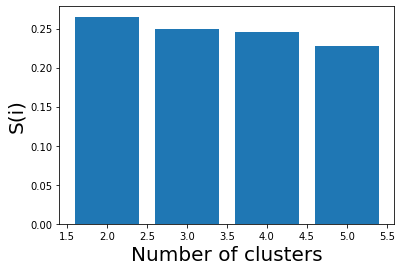

In [38]:
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

In [53]:
cluster = ac2.fit_predict(count_normalized)
cluster

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [54]:
count_normalized_array = count_normalized.values

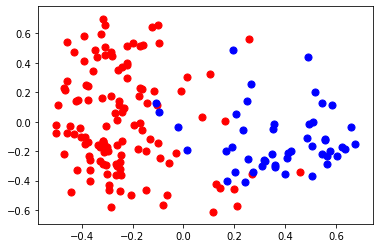

In [55]:
plt.scatter(count_normalized_array[Cluster==0, 0], count_normalized_array[Cluster==0, 1], s=50, marker='o', color='red')
plt.scatter(count_normalized_array[Cluster==1, 0], count_normalized_array[Cluster==1, 1], s=50, marker='o', color='blue')
plt.scatter(count_normalized_array[Cluster==2, 0], count_normalized_array[Cluster==2, 1], s=50, marker='o', color='green')
plt.scatter(count_normalized_array[Cluster==3, 0], count_normalized_array[Cluster==3, 1], s=50, marker='o', color='purple')
plt.scatter(count_normalized_array[Cluster==4, 0], count_normalized_array[Cluster==4, 1], s=50, marker='o', color='orange')
plt.show()

In [56]:
count_new["Cluster"] = cluster

In [60]:
count_new.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'Cluster'],
      dtype='object')

In [61]:
count_new.groupby('Cluster')[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']].mean().reset_index()

,Cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,17.436975,45.326714,6.845630,47.607276,22443.193277,5.943958,75.081513,2.143277,17389.781513
1,1,89.918750,30.652500,6.741458,45.112500,4008.812500,12.338229,59.335417,4.942917,1992.291667
